# KANYE WEST TWEETS

### Analyzation of kanye west tweets. Example of text mining. Used technics are: tokenization, stopwords and lemmatization.

In [134]:
import nltk
import pandas as pd
from nltk import tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import text2emotion as te

nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download('vader_lexicon')
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\olewn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\olewn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\olewn\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\olewn\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\olewn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Firstly, we will preprocess data. Delete spam, duplicates and posts from other social media than Twitter. Then we change our data to only contain date in YYYY:MM:DD format.

In [125]:
df = pd.read_csv('tweets.csv')
df["text"] = df["text"].astype(str).str.lower()
df = df.drop_duplicates(subset=['text'])
df = df[~df['text'].str.contains('@@@@@@@@')]
df = df[~df['text'].str.contains('http://')]
df = df[~df['text'].str.contains('https://')]
filter = df['source'].str.contains("Twitter.*")
df = df[filter]
print(df.shape)

df["date"] = df["date"].apply(lambda x: x[:10])
print(df["date"].head(1))
print(df["text"].head(5))

(9600, 12)
1    2022-12-19
Name: date, dtype: object
1    can we all agree that ye has a point\n\n#kanye...
3                            #kanyewest  suck my di̇ck
5    ye is the most recognised and original jew, th...
6       kanye did nothing wrong #hitler #ye #kanyewest
9    #kanyewest is one of top 3 favorite rappers ju...
Name: text, dtype: object


### Now we will preprocess the text. First part is tokenization. We will split the text into words. If this text was build of 'normal' sentences we also would need to split text into sentences, and then into words.

In [126]:
regexp = RegexpTokenizer("\w+")
df["text_token"] = df["text"].apply(regexp.tokenize)
print(df["text_token"].head(5))

1    [can, we, all, agree, that, ye, has, a, point,...
3                        [kanyewest, suck, my, di, ck]
5    [ye, is, the, most, recognised, and, original,...
6    [kanye, did, nothing, wrong, hitler, ye, kanye...
9    [kanyewest, is, one, of, top, 3, favorite, rap...
Name: text_token, dtype: object


### Now we download stopwords - the words which basically are not so important in sentences. Also we add some special stopwords for this exercise - the nickname of Kanye West. Then we delete them from our tweets. Second thing what we delete are words that are no longer than 2 letters.

In [127]:
stopwords = nltk.corpus.stopwords.words("english")
my_stopwords = ["kanyewest"]
stopwords.extend(my_stopwords)
print(df["text_token"].head(5))

df["text_token"] = df["text_token"].apply(lambda x: [item for item in x if item not in stopwords])
df["text_string"] = df["text_token"].apply(lambda x: " ".join([item for item in x if len(item)>2]))
print(df[['text', 'text_token', 'text_string']].head(5))

1    [can, we, all, agree, that, ye, has, a, point,...
3                        [kanyewest, suck, my, di, ck]
5    [ye, is, the, most, recognised, and, original,...
6    [kanye, did, nothing, wrong, hitler, ye, kanye...
9    [kanyewest, is, one, of, top, 3, favorite, rap...
Name: text_token, dtype: object
                                                text  \
1  can we all agree that ye has a point\n\n#kanye...   
3                          #kanyewest  suck my di̇ck   
5  ye is the most recognised and original jew, th...   
6     kanye did nothing wrong #hitler #ye #kanyewest   
9  #kanyewest is one of top 3 favorite rappers ju...   

                                          text_token  \
1               [agree, ye, point, ye2024, joebiden]   
3                                     [suck, di, ck]   
5  [ye, recognised, original, jew, hate, self, el...   
6                [kanye, nothing, wrong, hitler, ye]   
9  [one, top, 3, favorite, rappers, listen, verse...   

                   

### Here we can see the frequency of words used in all of tweets.

In [128]:
all_words = ' '.join([word for word in df['text_string']])
tokenized_words = tokenize.word_tokenize(all_words, language="english")
fdist = FreqDist(tokenized_words)
fdist

FreqDist({'kanye': 4626, 'adidas': 1658, 'people': 1444, 'like': 943, 'black': 817, 'amp': 767, 'west': 646, 'get': 611, 'said': 609, 'hitler': 577, ...})

### There we will delete word which are infrequent.

In [129]:
df["text_string_fdist"] = df["text_token"].apply(lambda x: " ".join([item for item in x if fdist[item] >= 4]))
print(df[['text', 'text_token', 'text_string']].head(5))

                                                text  \
1  can we all agree that ye has a point\n\n#kanye...   
3                          #kanyewest  suck my di̇ck   
5  ye is the most recognised and original jew, th...   
6     kanye did nothing wrong #hitler #ye #kanyewest   
9  #kanyewest is one of top 3 favorite rappers ju...   

                                          text_token  \
1               [agree, ye, point, ye2024, joebiden]   
3                                     [suck, di, ck]   
5  [ye, recognised, original, jew, hate, self, el...   
6                [kanye, nothing, wrong, hitler, ye]   
9  [one, top, 3, favorite, rappers, listen, verse...   

                                         text_string  
1                        agree point ye2024 joebiden  
3                                               suck  
5  recognised original jew hate self elected made...  
6                         kanye nothing wrong hitler  
9  one top favorite rappers listen verse runthistow

### Lemmatization. It is a process in which we delete different forms of one word and leave the "basic" word. It will help our algorithm.

In [130]:
wordnet_lem = WordNetLemmatizer()
df["text_string_lem"] = df["text_string_fdist"].apply(wordnet_lem.lemmatize)

df['is_equal']= (df['text_string_fdist']==df['text_string_lem'])
df.is_equal.value_counts()

True     9594
False       6
Name: is_equal, dtype: int64

### How many of the 10 most frequent words after lemmatization were used in all tweets.

 kanye adidas people   like  black    amp   west    get   said hitler 
  4626   1658   1444    943    817    767    646    611    609    577 
None


<AxesSubplot:>

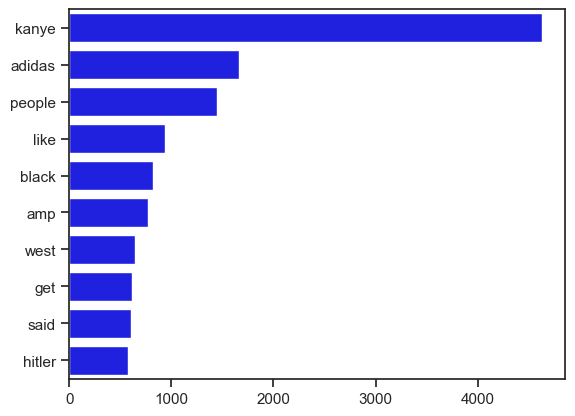

In [131]:
all_words_lem = ' '.join([word for word in df['text_string_lem']])
words = tokenize.word_tokenize(all_words_lem)
fd = FreqDist(words)
print(fd.tabulate(10))

top_10 = fd.most_common(10)
fdist = pd.Series(dict(top_10))
sns.set_theme(style="ticks")
sns.barplot(y=fdist.index, x=fdist.values, color='blue')

### Now, with the library "vader" we analyze the polarity of tweets. We also delete unnecessary columns and leave only those which are important. As shown below we have negative, neutral and positive tweets.

            user_name         user_location        date  \
1         Jon carrick                   NaN  2022-12-19   
3          god dammit                   NaN  2022-12-19   
5     Oliver Brittain  Northampton, England  2022-12-19   
6  Man with white van                   NaN  2022-12-19   
9            jonathan         Charlotte, NC  2022-12-19   

                                                text  \
1  can we all agree that ye has a point\n\n#kanye...   
3                          #kanyewest  suck my di̇ck   
5  ye is the most recognised and original jew, th...   
6     kanye did nothing wrong #hitler #ye #kanyewest   
9  #kanyewest is one of top 3 favorite rappers ju...   

                              hashtags               source  \
1  ['KanyeWest', 'ye2024', 'JoeBiden']      Twitter Web App   
3                        ['KanyeWest']   Twitter for iPhone   
5                                  NaN  Twitter for Android   
6        ['hitler', 'ye', 'KanyeWest']   Twitter for iPh

<AxesSubplot:xlabel='count', ylabel='sentiment'>

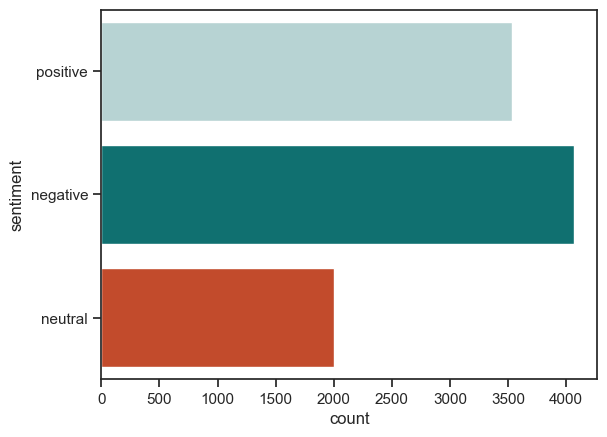

In [132]:
analyzer = SentimentIntensityAnalyzer()
df["polarity"] = df["text_string_lem"].apply(lambda x: analyzer.polarity_scores(x))

df = pd.concat(
    [df.drop(['user_description', 'user_created', 'user_followers','user_friends', 'user_favourites', 'user_verified', 'polarity'], axis=1), 
     df['polarity'].apply(pd.Series)], axis=1)

df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')

sns.countplot(y='sentiment', 
             data=df, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             )

### Here we group our tweets by date and take the average polarity. After sorting we display the result. 

C:\Users\olewn\AppData\Local\Temp\ipykernel_860\1530840048.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_sentiment_df = df.groupby('date').mean()


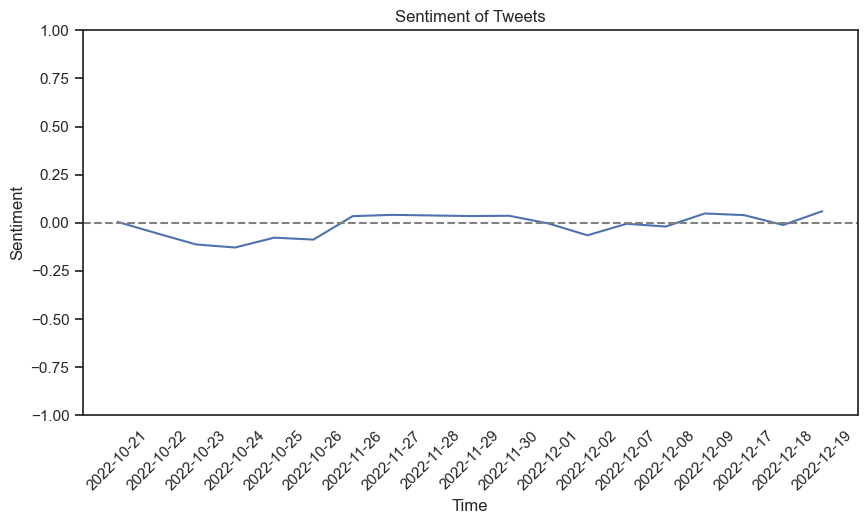

In [133]:
daily_sentiment_df = df.groupby('date').mean()
daily_sentiment_df = daily_sentiment_df.sort_values(by=['date'])
# print(daily_sentiment_df)
# print(daily_sentiment_df.shape)

plt.figure(figsize=(10,5))
g = sns.lineplot(x='date', y='compound', data=daily_sentiment_df)

plt.xticks(rotation=45)
g.set(ylim=(-1, 1))
g.set(title='Sentiment of Tweets')
g.set(xlabel="Time")
g.set(ylabel="Sentiment")
g.tick_params(bottom=False)

g.axhline(0, ls='--', c = 'grey')

### With the library "text2emotions" we can specify if tweets are happy, angry, surprise, sad or fear. We make the copy of DataFrame and use the library

In [71]:
df_emotion = df.copy()
df_emotion['emotion'] = df_emotion["text_token"].apply(lambda x: te.get_emotion(' '.join(x)))

### Then we split the "emotion" column into 5 separate columns.

In [72]:
df_emotion['happy'] = df_emotion['emotion'].apply(lambda x: x['Happy'])
df_emotion['angry'] = df_emotion['emotion'].apply(lambda x: x['Angry'])
df_emotion['surprise'] = df_emotion['emotion'].apply(lambda x: x['Surprise'])
df_emotion['sad'] = df_emotion['emotion'].apply(lambda x: x['Sad'])
df_emotion['fear'] = df_emotion['emotion'].apply(lambda x: x['Fear'])

### Once again we group this data by date and take average emotions. Then we sort and display it below.

C:\Users\olewn\AppData\Local\Temp\ipykernel_860\4005390345.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gruped_emotion_df = df_emotion.groupby('date').mean()


                 neg       neu       pos  compound     happy     angry  \
date                                                                     
2022-10-21  0.191919  0.637366  0.170683 -0.015248  0.100591  0.063817   
2022-10-22  0.180990  0.655131  0.158788 -0.056718  0.068030  0.047576   
2022-10-23  0.197686  0.670343  0.131971 -0.141484  0.089183  0.083039   
2022-10-24  0.210913  0.638408  0.150678 -0.135624  0.085893  0.067664   
2022-10-25  0.187048  0.660743  0.150698 -0.083580  0.091545  0.072249   
2022-10-26  0.201693  0.643156  0.155162 -0.094831  0.089839  0.071473   
2022-11-26  0.133624  0.694258  0.172043  0.035787  0.115054  0.050753   
2022-11-27  0.150504  0.653920  0.186726  0.044466  0.113274  0.047699   
2022-11-28  0.162177  0.654872  0.182965  0.035970  0.099716  0.068794   
2022-11-29  0.137907  0.698814  0.163260  0.030068  0.090898  0.072425   
2022-11-30  0.146325  0.679045  0.174649  0.035918  0.110909  0.042208   
2022-12-01  0.177329  0.642579  0.1792

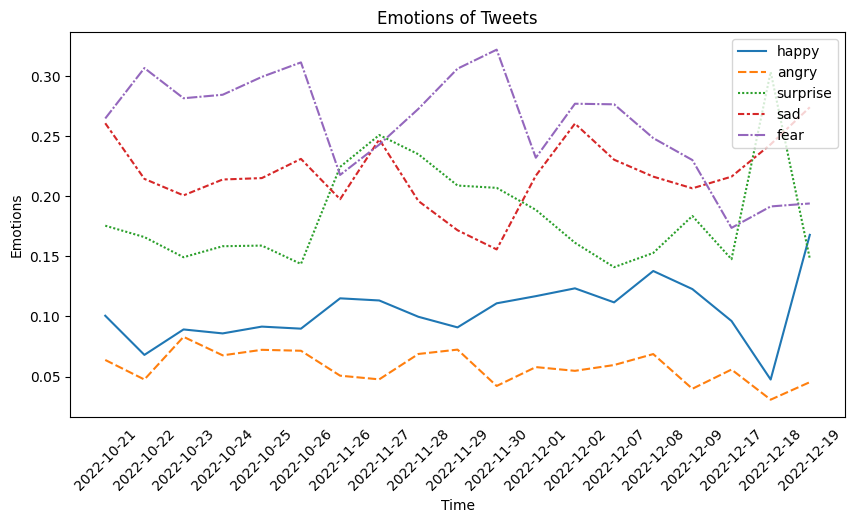

In [74]:
gruped_emotion_df = df_emotion.groupby('date').mean()
gruped_emotion_df = gruped_emotion_df.sort_values(by=['date'])
# print(gruped_emotion_df)

plt.figure(figsize=(10,5))
g = sns.lineplot(data=gruped_emotion_df[["happy","angry","surprise","sad","fear"]])

plt.xticks(rotation=45)
g.set(title='Emotions of Tweets')
g.set(xlabel="Time")
g.set(ylabel="Emotions")
g.tick_params(bottom=False)

## Suprisingly, in this dataset, tweets are mostly frightening. From polarity analyze we got that the average emotion is neutral. But it rather has high negative tweets.

### Bibliography
Kanye West tweets dataset - https://www.kaggle.com/datasets/konradb/kanye-west-tweets

Pandas documentation - https://pandas.pydata.org/docs/reference/frame.html

NLTK documentation - https://www.nltk.org

Text mining - https://www.kirenz.com/post/2021-12-11-text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/